WeatherPY

In [2]:
# dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import requests
import scipy.stats as st
from scipy.stats import linregress
import json
import time
import os
from datetime import datetime

# import the OpenWeatherMap API key
from api_keys import weather_api_key

# import ciiypy to determine the cities based on latitude and longitude
from citipy import citipy



Generate the Cities List by Using citipy Library

In [3]:
# empty list for holding the latitude and longitude combinations
lat_lngs = []

# empty list for holding the cities
cities = []

# range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# create a set of random latitude and longitude combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# identify the nearest city for each latitude and longitude combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # if the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)

# print the city count to confirm sufficient count
print(f"The number of cities in the list: {len(cities)}")

The number of cities in the list: 578


Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
from api_keys import weather_api_key
# set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# set the units for the temperature
units = "metric"

# set the units for the humidity
#humidity_units = "%"

# set the units for the wind speed
#wind_units = "m/s"

# set the units for the cloudiness
#cloud_units = "%"

# create an empty list to hold the weather data for each city
city_data = []

# print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# create counters
record_count = 1
set_count = 1

# loop through all the cities in the list to fetch weather data
for i, city in enumerate(cities):
        
    # group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # create the endpoint URL
    city_url = f"{base_url}q={city}&appid={weather_api_key}&units={units}"

    # log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # add 1 to the record count
    record_count += 1

    # run an API request for each of the cities
    try:
        # parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # parse out latitude, longitude, maximum temperature, humidity, cloudiness, wind speed, country and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_country = city_weather["sys"]["country"]
        city_wind_speed = city_weather["wind"]["speed"]
        city_clouds = city_weather["clouds"]["all"]
        city_date = city_weather["dt"]

    # append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind_speed,
                          "Country": city_country,
                          "Date": city_date})
    
    # if an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# indicate that data loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fale old settlement
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | hawaiian paradise park
Processing Record 4 of Set 1 | olonkinbyen
Processing Record 5 of Set 1 | whitehorse
Processing Record 6 of Set 1 | alotau
City not found. Skipping...
Processing Record 7 of Set 1 | amarante do maranhao
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | saint-felicien
Processing Record 11 of Set 1 | manokwari
Processing Record 12 of Set 1 | kourou
Processing Record 13 of Set 1 | fairmont
Processing Record 14 of Set 1 | abra pampa
Processing Record 15 of Set 1 | klerksdorp
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | chonchi
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | margaret river
Processing Record

In [5]:
# convert the city data into a pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# show the record count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [7]:
# display the sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fale Old Settlement,-9.3852,-171.2468,27.44,87,100,8.97,TK,1707616237
1,Hawaiian Paradise Park,19.5933,-154.9731,26.13,72,0,4.63,US,1707616237
2,Olonkinbyen,70.9221,-8.7187,-3.35,65,100,6.36,SJ,1707616237
3,Whitehorse,60.7161,-135.0538,0.57,69,20,5.14,CA,1707616238
4,Amarante Do Maranhao,-5.5667,-46.7422,22.54,92,100,1.30,BR,1707616238


In [8]:
# export the city data into a CSV
city_data_df.to_csv("WeatherPy_Database.csv", index_label="City_ID")

In [9]:
# read saved data
city_data_df = pd.read_csv("WeatherPy_Database.csv", index_col="City_ID")

# display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Fale Old Settlement,-9.3852,-171.2468,27.44,87,100,8.97,TK,1707616237
1,Hawaiian Paradise Park,19.5933,-154.9731,26.13,72,0,4.63,US,1707616237
2,Olonkinbyen,70.9221,-8.7187,-3.35,65,100,6.36,SJ,1707616237
3,Whitehorse,60.7161,-135.0538,0.57,69,20,5.14,CA,1707616238
4,Amarante Do Maranhao,-5.5667,-46.7422,22.54,92,100,1.30,BR,1707616238


Create the Scatter Plots Requested

Latitude Vs. Temperature

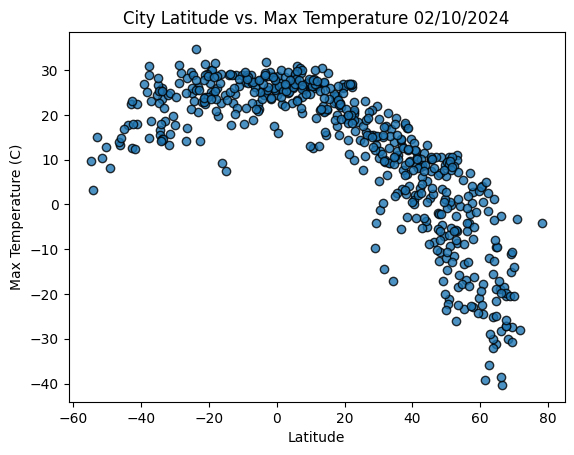

In [10]:
# scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# add title, labels and grid
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

# save the figure
plt.savefig("Fig1.png")

# show the plot
plt.show()

Latitude vs. Humidity

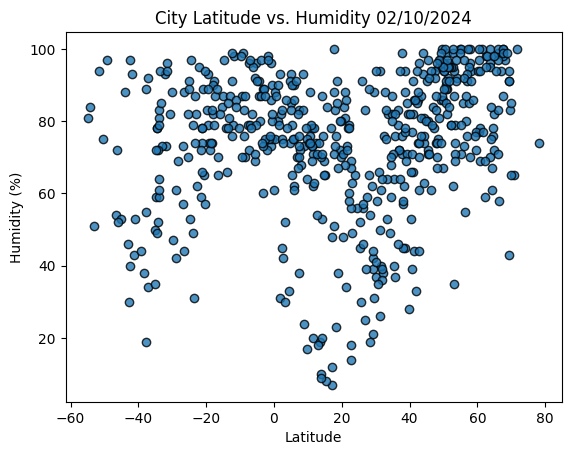

In [11]:
# scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# add title, labels and grid
plt.title(f"City Latitude vs. Humidity {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# save the figure
plt.savefig("Fig2.png")

# show the plot
plt.show()

Latitude vs. Cloudiness

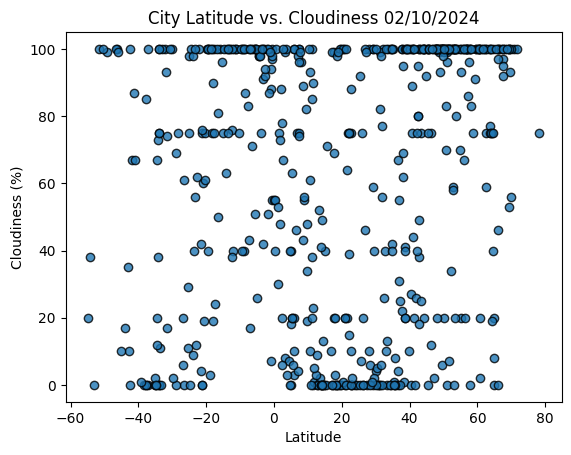

In [12]:
# scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# add title, labels and grid
plt.title(f"City Latitude vs. Cloudiness {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# save the figure
plt.savefig("Fig3.png")

# show the plot
plt.show()


Latitude vs. Wind Speed Plot

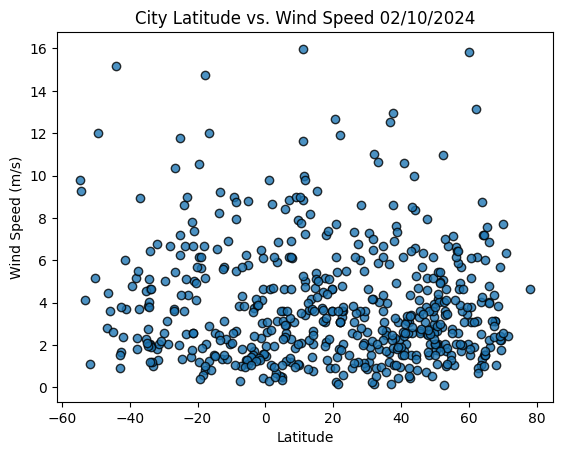

In [13]:
# scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# add title, labels
plt.title(f"City Latitude vs. Wind Speed {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

# save the figure
plt.savefig("Fig4.png")

# show the plot
plt.show()


Requirement 2: Compute Linear Regression for Each Relationship

In [14]:
# define a function for linear regression
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.show()

In [15]:
# a new DataFrame for Northern Hemisphere
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Hawaiian Paradise Park,19.5933,-154.9731,26.13,72,0,4.63,US,1707616237
2,Olonkinbyen,70.9221,-8.7187,-3.35,65,100,6.36,SJ,1707616237
3,Whitehorse,60.7161,-135.0538,0.57,69,20,5.14,CA,1707616238
6,Bethel,41.3712,-73.4140,10.68,86,20,2.06,US,1707616239
7,Saint-Felicien,48.6501,-72.4491,3.38,81,100,2.06,CA,1707616239


In [16]:
# a new DataFrame for Southern Hemisphere
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Fale Old Settlement,-9.3852,-171.2468,27.44,87,100,8.97,TK,1707616237
4,Amarante Do Maranhao,-5.5667,-46.7422,22.54,92,100,1.30,BR,1707616238
5,West Island,-12.1568,96.8225,28.99,79,40,5.66,CC,1707616238
8,Manokwari,-0.8667,134.0833,28.42,73,94,3.05,ID,1707616239
11,Abra Pampa,-22.7205,-65.6970,14.20,62,62,4.38,AR,1707616239


Temperature vs. Latitude Linear Regression Plot

The correlation coefficient between latitude and max temperature is -0.87


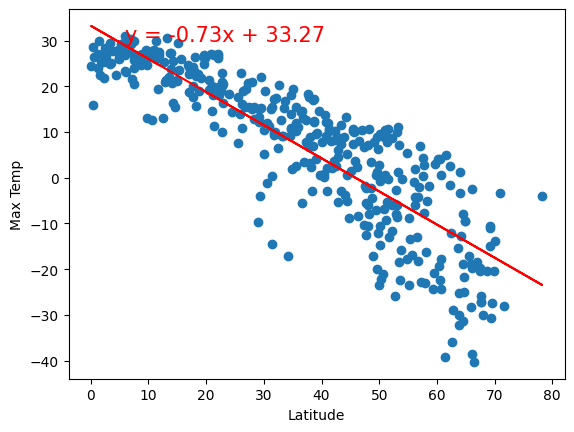

In [18]:
# linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# calculate the correlation coefficient
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation coefficient between latitude and max temperature is {correlation}")

# call the function
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The correlation coefficient between latitude and max temperature is 0.53


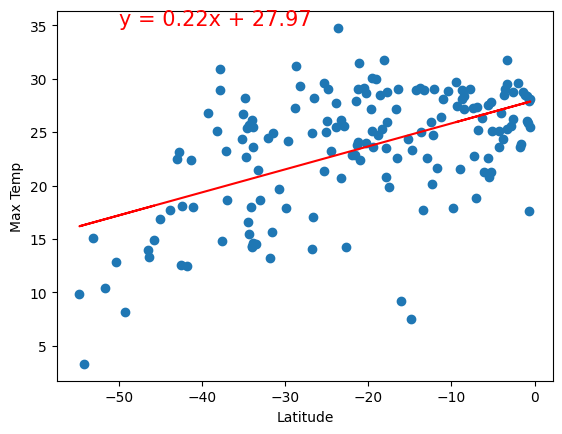

In [19]:
# linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# calculate the correlation coefficient
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation coefficient between latitude and max temperature is {correlation}")

# call the function
plot_linear_regression(x_values, y_values, 'Max Temp',(-50,35))


Discussion about linear regression:

Northern Hemisphere:
- 

Southern Hemisphere:
- 

Humidity vs. Latitude

The correlation coefficient between latitude and humidity is 0.39


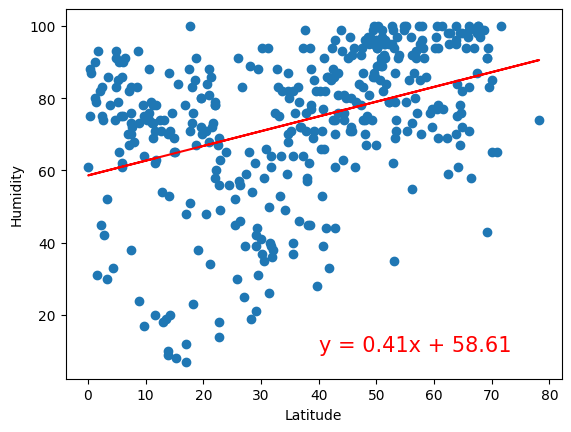

In [20]:
# linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# calculate the correlation coefficient
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation coefficient between latitude and humidity is {correlation}")

# call the function
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))


The correlation coefficient between latitude and humidity is 0.4


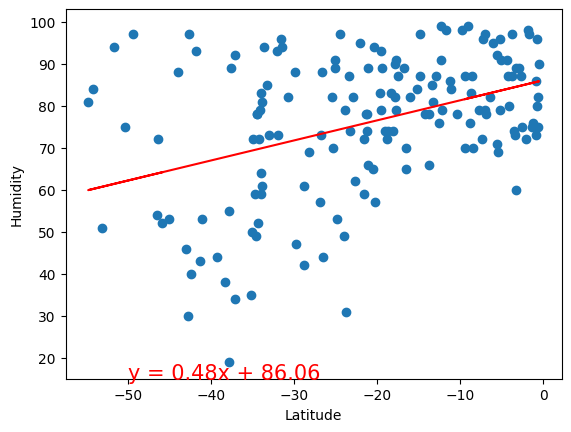

In [21]:
# linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# calculate the correlation coefficient
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation coefficient between latitude and humidity is {correlation}")

# call the function
plot_linear_regression(x_values, y_values, 'Humidity',(-50,15))

Discussion about the linear relationship:

Northern:

Southern:

Cloudiness vs. Lattitude Linear Regression Plot

The correlation coefficient between latitude and cloudiness is 0.4


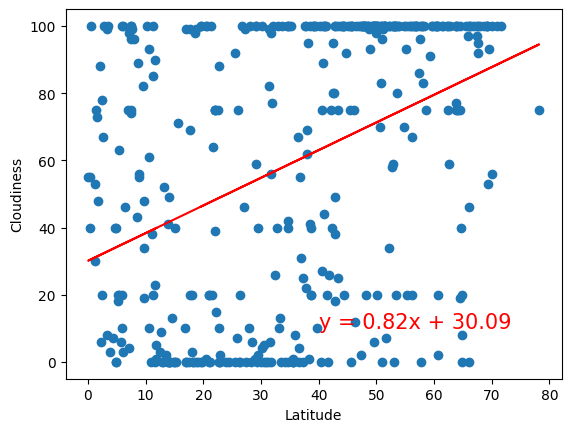

In [22]:
# linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# calculate the correlation coefficient
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation coefficient between latitude and cloudiness is {correlation}")

# call the function
plot_linear_regression(x_values, y_values, 'Cloudiness',(40,10))

The correlation coefficient between latitude and cloudiness is 0.38


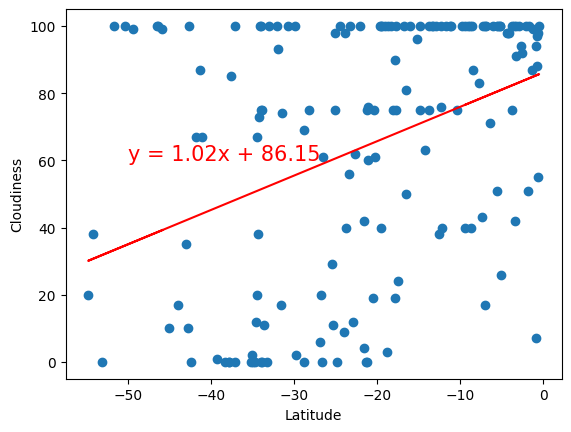

In [23]:
# linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# calculate the correlation coefficient
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation coefficient between latitude and cloudiness is {correlation}")

# call the function
plot_linear_regression(x_values, y_values, 'Cloudiness',(-50,60))

Discussion about the linear relationship:

Northern

Southern

Wind Speed vs. Lattitude Linear Regression Plot

The correlation coefficient between latitude and wind speed is -0.05


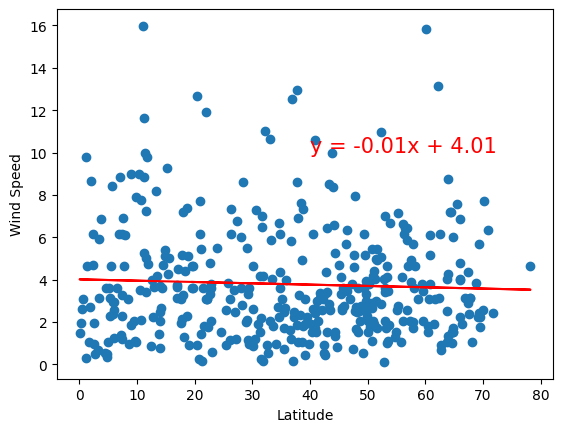

In [24]:
# linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# calculate the correlation coefficient
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation coefficient between latitude and wind speed is {correlation}")

# call the function
plot_linear_regression(x_values, y_values, 'Wind Speed',(40,10))

The correlation coefficient between latitude and wind speed is -0.16


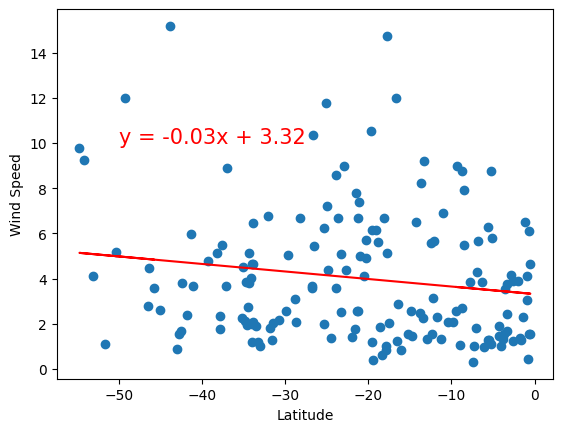

In [25]:
# linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# calculate the correlation coefficient
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation coefficient between latitude and wind speed is {correlation}")

# call the function
plot_linear_regression(x_values, y_values, 'Wind Speed',(-50,10))